# Table of contents <a id = "index">

#### [Importing Libraries](#import)

#### [Helper Functions](#functions)
- [Histogram](#hist)

#### [Importing Dataset](#data)
#### [Modeling](#modeling)

### Importing Libraries  
#### [Index](#index)
<a id="import">

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

### Helper Functions <a id='functions'>
#### [Index](#index)

---
#### Histogram <a id = "hist">

In [2]:
def distribution(df, feature, bins = 50, kde = True, hue = None):
    
    """Plots histogram with kde and skewness value;
    
    Params: 
    
    df -> (dataframe) : Source dataset to plot histogram ;
    feature -> (str) : Name of feature ;
    bins -> (int) : Number of bins to plot (Default = 50) ;
    kde -> (bool) : Kernel Density Function (Default = True) """
    
    sns.histplot(data = df, x = feature, bins = bins, kde = kde, hue = hue)
    plt.title(f"Skewness: {round(df[feature].skew(), 4)}")

### Importing Dataset <a id='data'>
#### [Index](#index)

In [3]:
customer_data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customer_data.shape

(200, 5)

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- No values are null
- **Four** numerical and **one** categorical features

In [5]:
customer_data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
141,142,Male,32,75,93
59,60,Male,53,46,46
150,151,Male,43,78,17
12,13,Female,58,20,15
189,190,Female,36,103,85


In [6]:
customer_data.drop('CustomerID',axis=1 ,inplace=True)
customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [7]:
customer_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


- Feature `Age` and `Annual Income` are assumed to be in gaussian distribution as **mean** and **median** are close in values
- Observing distribution by histogram plots:

In [8]:
features = [feature for feature in customer_data.columns if customer_data[feature].dtype != 'object']
features

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


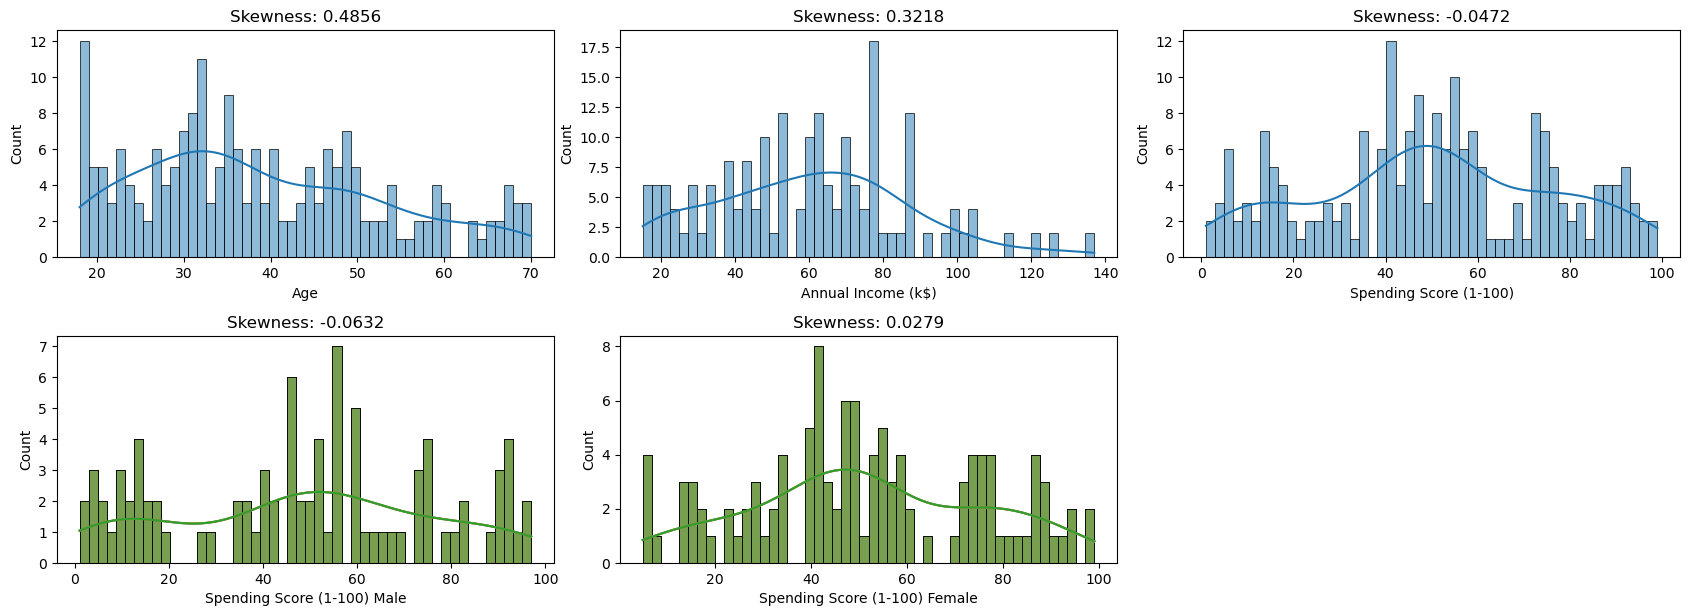

In [9]:
%time
plt.figure(figsize = (17,15))

for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    distribution(customer_data, feature)
    
    plt.subplot(5,3,4)
    distribution(customer_data[customer_data['Gender'] == 'Male'], 'Spending Score (1-100)')
    plt.xlabel("Spending Score (1-100) Male")
    plt.subplot(5,3,5)
    distribution(customer_data[customer_data['Gender'] == 'Female'], 'Spending Score (1-100)')
    plt.xlabel("Spending Score (1-100) Female")
    
plt.tight_layout()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


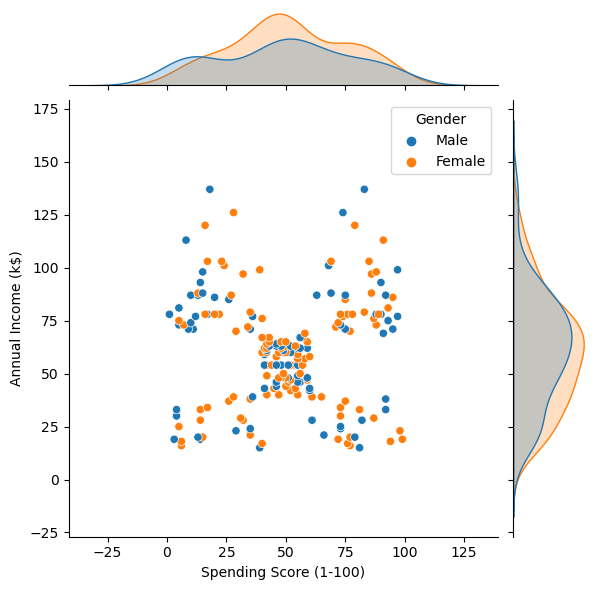

In [10]:
%time
sns.jointplot(data = customer_data, x = 'Spending Score (1-100)', y = 'Annual Income (k$)' , hue = 'Gender')
plt.show()

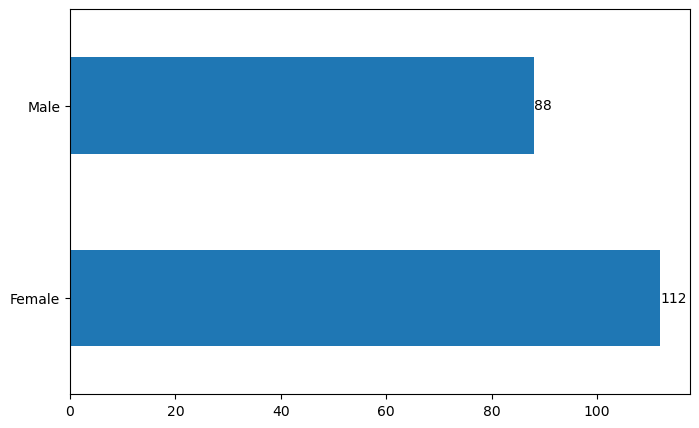

In [11]:
plt.figure(figsize=(8,5))
ax = customer_data['Gender'].value_counts().plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i)

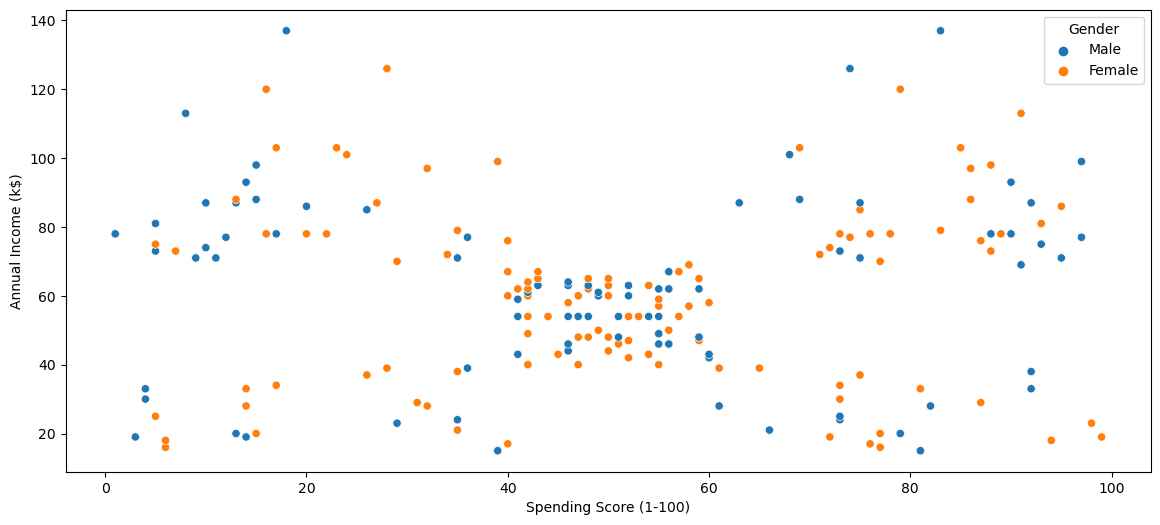

In [15]:
plt.figure(figsize=(14,6))
fig = sns.scatterplot(data=customer_data, x = "Spending Score (1-100)",y = "Annual Income (k$)", hue='Gender')
plt.show()

### Modeling <a id = "modeling">
#### [Index](#index)

In [16]:
df = customer_data.iloc[:,1:]
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [17]:
scaler = StandardScaler()

In [18]:
dfs = scaler.fit_transform(df)

In [19]:
dfs[:10]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002]])

In [21]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(init = "k-means++", n_clusters = i, random_state=42)
    kmeans.fit(dfs)
    inertia.append(kmeans.inertia_)

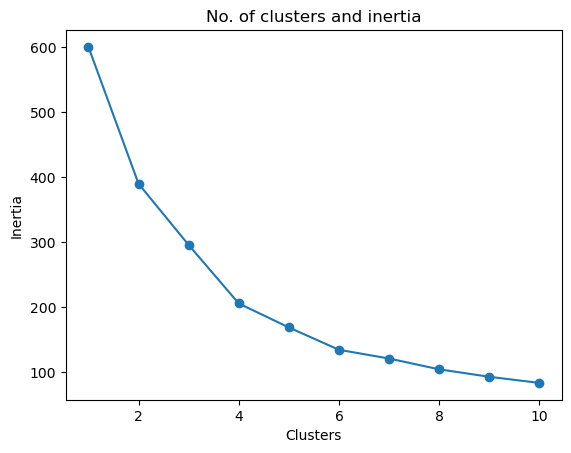

In [22]:
plt.plot(range(1,11), inertia, marker = 'o')
plt.title("No. of clusters and inertia")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

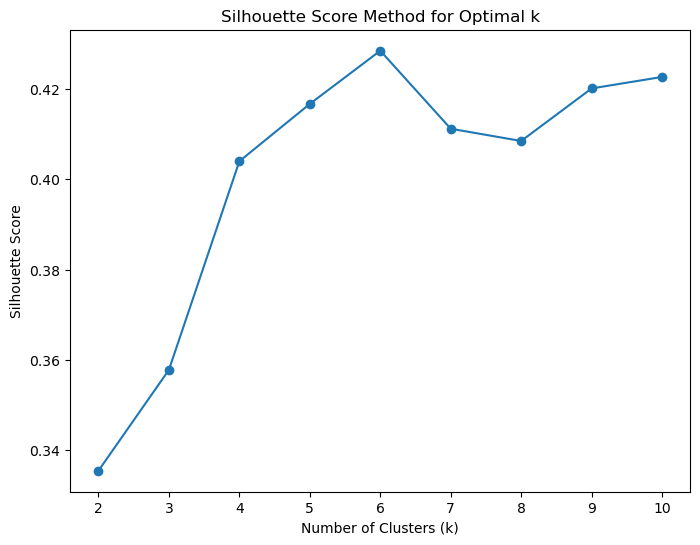

In [23]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(dfs)
    silhouette_scores.append(silhouette_score(dfs, labels))

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k')
plt.show()

#### Selecting **6** as the optimal cluster size

In [24]:
clusterNum = 6
kmeans = KMeans(n_clusters = clusterNum)
kmeans.fit(dfs)

KMeans(n_clusters=6)

In [25]:
labels = kmeans.labels_
print(labels)

[1 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5 1 5
 1 5 1 0 1 5 1 5 1 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 4 2 4 3 4 3 4 3 4 2 4 3 4 3 4 2 4 3 4 2 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 0 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


In [131]:
slabel = labels.astype('str')

numpy.ndarray

In [27]:
centroids = kmeans.cluster_centers_

In [132]:
fig = px.scatter(data_frame=dfs, x=dfs[:, 0], y=dfs[:, 1],
                 color_continuous_scale = 'darkmint', color = slabel,
                 labels={'size':'cluster', 'x':'Age', 'y':'Annual Income (k$)', 'color':'Cluster'},
                 hover_data={'Gender':customer_data['Gender'], 'Age':customer_data['Age'], 'Annual Income (k$)':customer_data['Annual Income (k$)']}, title='Clusters with Age by Income')


fig.add_scatter(x=centroids[:, 0], y=centroids[:, 1], mode='markers', marker=dict(size=10, symbol='x', color='black'), name='Centroids')
fig

In [148]:
fig = px.scatter(data_frame=dfs, x=dfs[:, 1], y=dfs[:, 2],
                 color_continuous_scale = 'darkmint', color = slabel,
                 labels={'size':'cluster', 'x':'Annual Income (k$)', 'y':'Spending Score (1-100)', 'color':'Cluster'},
                 hover_data={'Gender':customer_data['Gender'], 'Annual Income (k$)':customer_data['Annual Income (k$)'], 'Spending Score (1-100)':customer_data['Spending Score (1-100)']},
                 title='Clusters with Income by Spending Score')


fig.add_scatter(x=centroids[:, 1], y=centroids[:, 2], mode='markers', marker=dict(size=10, symbol='x', color='black'), name='Centroids')
fig

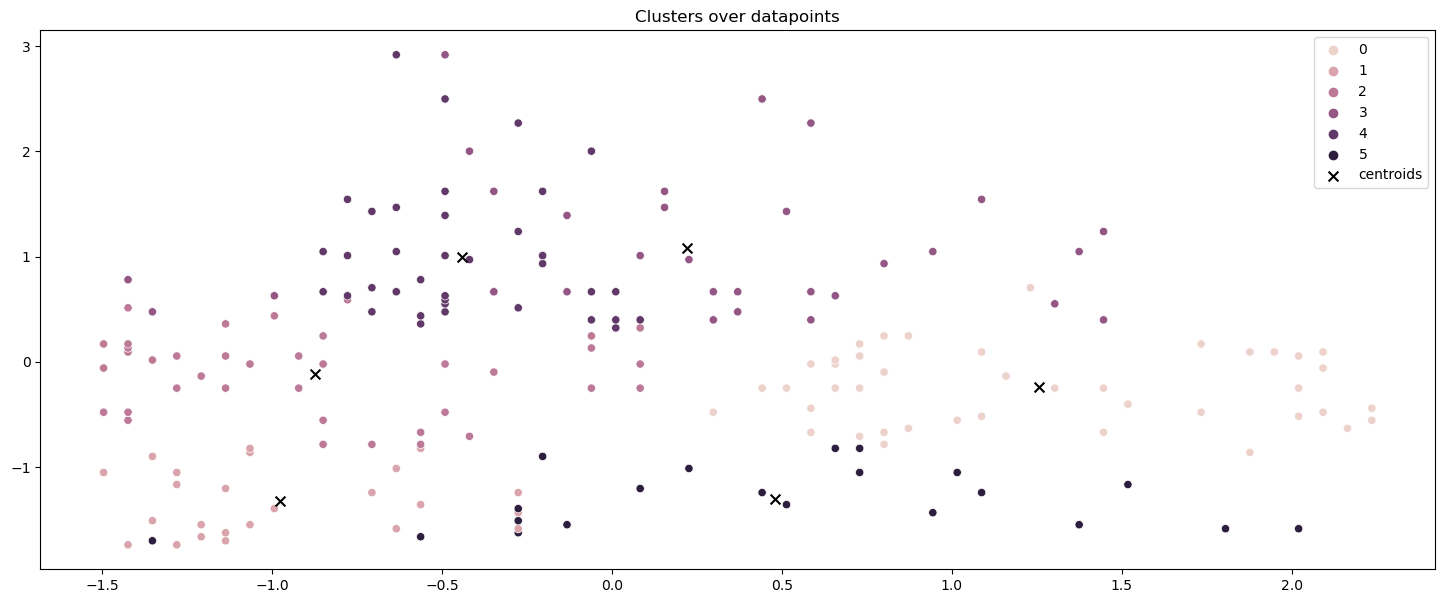

In [133]:
plt.figure(figsize=(18,7))
sns.scatterplot(data = dfs, x= dfs[:,0], y=dfs[:,1], hue=labels)
plt.scatter(x=centroids[:,0],y = centroids[:,1], marker='x', color='k',s=50 ,label= "centroids")
plt.title("Clusters over datapoints")
plt.legend()
plt.show()

---

In [181]:
df['label'] = labels

In [209]:
grps = df.groupby('label')['Age', 'Spending Score (1-100)', 'Annual Income (k$)'].agg({'mean','min','max','median'})
grps.reset_index(inplace=True)

In [218]:
grps

label    Age                    Spending Score (1-100)                     \
        median min       mean max                 median min       mean max   
0     0   54.0  43  56.333333  70                   49.0  35  49.066667  60   
1     1   23.5  18  25.250000  35                   76.5  39  76.916667  99   
2     2   26.0  18  26.684211  40                   49.5  10  47.789474  60   
3     3   43.0  19  41.939394  59                   16.0   1  16.969697  39   
4     4   32.0  27  32.692308  40                   83.0  63  82.128205  97   
5     5   46.0  20  45.523810  67                   15.0   3  19.380952  40   

  Annual Income (k$)                      
              median min       mean  max  
0               54.0  38  54.266667   79  
1               24.5  15  25.833333   39  
2               60.0  40  57.578947   76  
3               86.0  71  88.939394  137  
4               79.0  69  86.538462  137  
5               25.0  16  26.285714   39

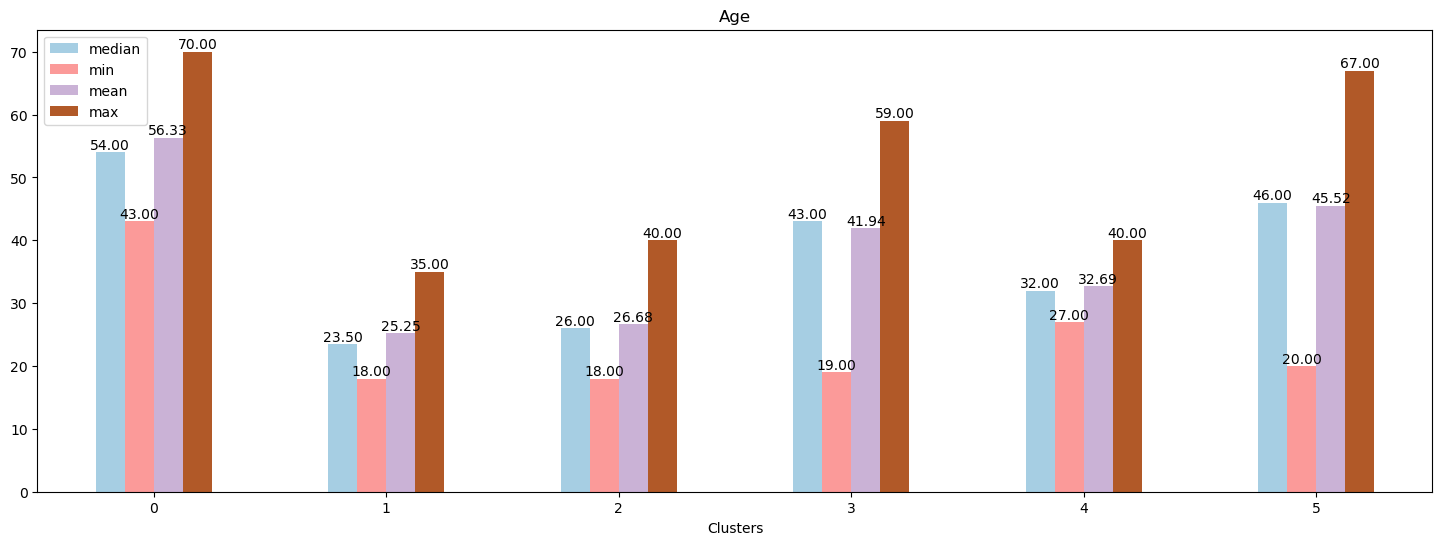

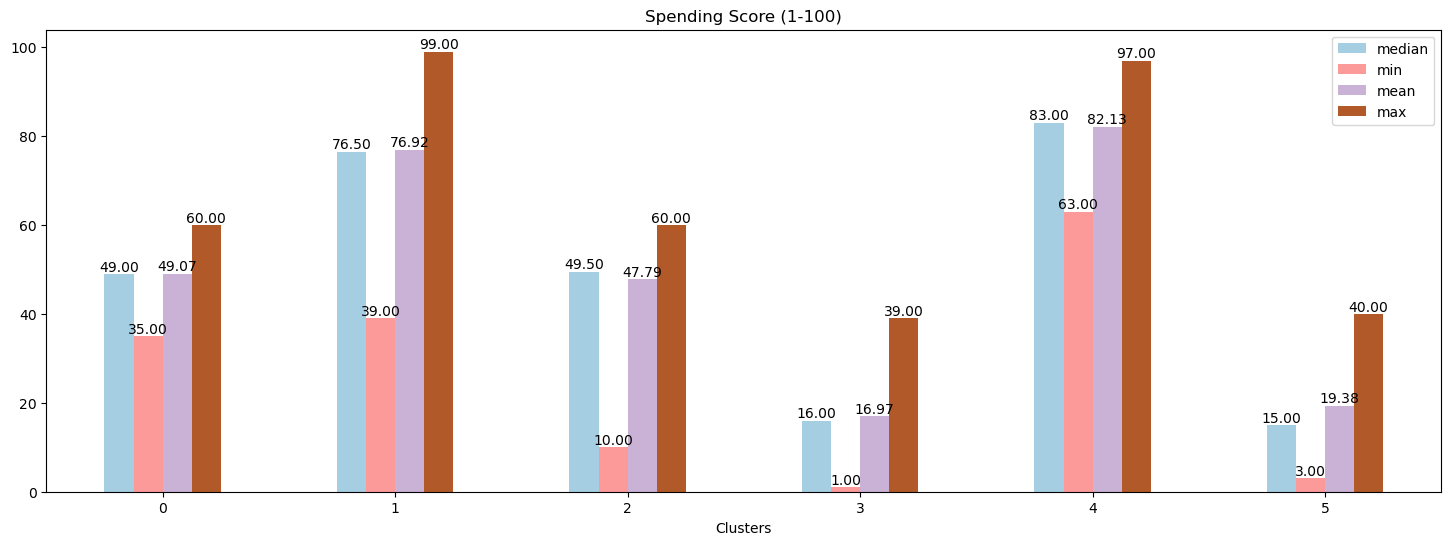

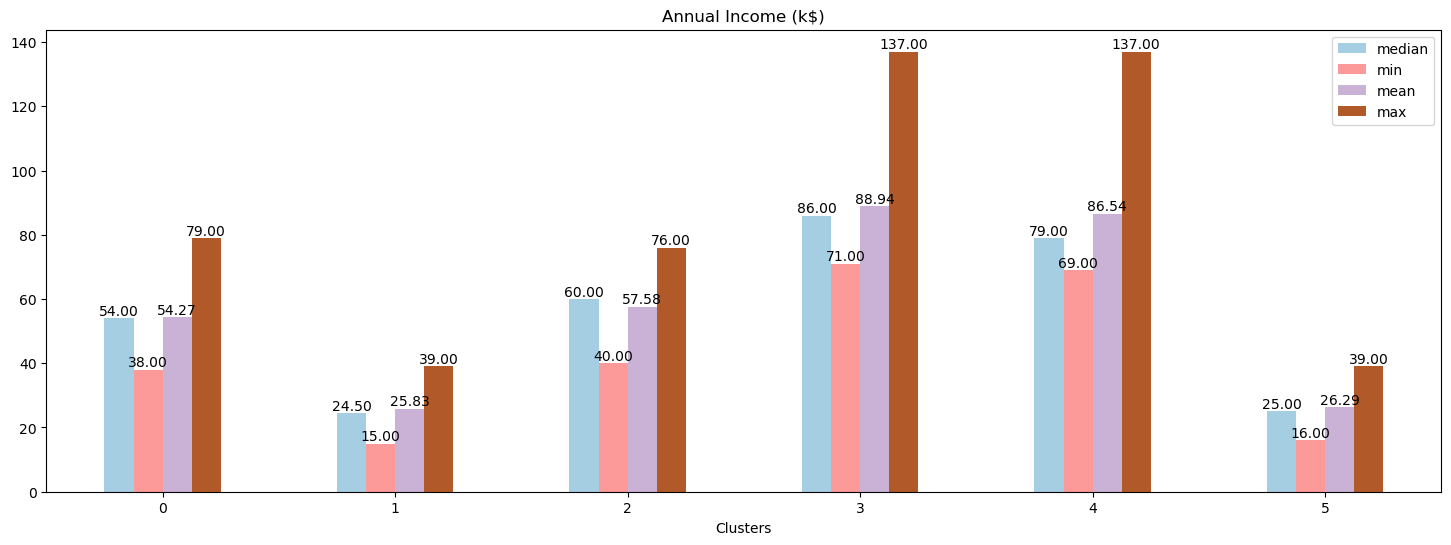

In [306]:
for feature in ['Age','Spending Score (1-100)', 'Annual Income (k$)']:
    
    ax = grps[feature].plot(kind='bar', figsize=(18,6), xlabel='Clusters', colormap='Paired', rot=0, title = f'{feature}')
    ax.legend(loc='best')
    for i in ax.containers:
        ax.bar_label(i, fmt='%0.2f', size=10)

---
### Predictive function

In [314]:
def Predict(INPUT):
    sample = np.array(INPUT)
    sample = sample.reshape(1, -1)
    result = kmeans.predict(sample)
    return result

In [315]:
AGE = 18
INCOME = 130
SPENDING_SCORE = 45 
INPUT = [AGE, INCOME, SPENDING_SCORE]

In [316]:
print(f'Assigned Cluster: {Predict(INPUT)}')

Assigned Cluster: [4]
